<a href="https://colab.research.google.com/github/queziamirandaDev/Python-para-DataScience/blob/main/14_Exercicio_analise_de_regress%C3%A3o_linear_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [24]:
df_nota = pd.read_csv('/content/Base_Notas_v1_com_notas.csv')

df_nota = df_nota.drop('aulas_participadas', axis=1)


df_nota.head()

,id,horas_estudo,nota_exame
0,0,5.993428,76.119754
1,1,4.723471,60.929961
2,2,6.295377,81.731317
3,3,8.046060,82.699637
4,4,4.531693,70.662399


In [25]:
df_nota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30 non-null     int64  
 1   horas_estudo  30 non-null     float64
 2   nota_exame    30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [26]:
df_nota.describe().round(2)

,id,horas_estudo,nota_exame
count,30.00,30.00,30.00
mean,14.50,4.62,71.81
std,8.80,1.80,8.88
min,0.00,1.17,54.48
25%,7.25,3.82,66.41
50%,14.50,4.53,71.40
75%,21.75,5.72,78.10
max,29.00,8.16,89.47


In [27]:
df_nota.isna().sum()

,0
id,0
horas_estudo,0
nota_exame,0


<Axes: >

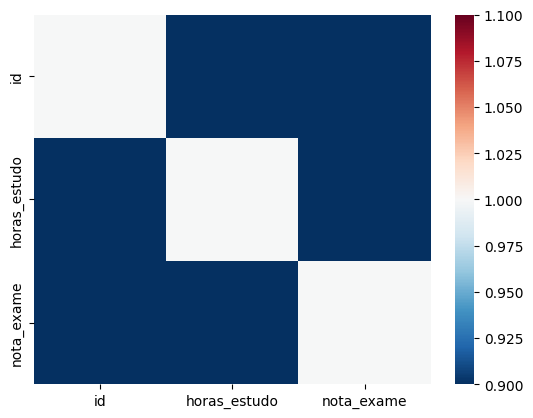

In [28]:
sns.heatmap(
    df_nota.corr(),
    cmap= 'RdBu_r',
    vmax=1, vmin=1
)

In [29]:
# ajuste do modelo

#variavel alvo

y = df_nota['nota_exame']


#variavel explicativa
df_nota['intercepto'] = 1
x=df_nota[['intercepto','horas_estudo']]

In [30]:
modelo = sm.OLS(y,x)

resultado = modelo.fit()

In [31]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     30.35
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           6.92e-06
Time:                        22:57:16   Log-Likelihood:                -96.553
No. Observations:                  30   AIC:                             197.1
Df Residuals:                      28   BIC:                             199.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercepto      55.3638      3.197     17.320   

<Axes: xlabel='horas_estudo', ylabel='nota_exame'>

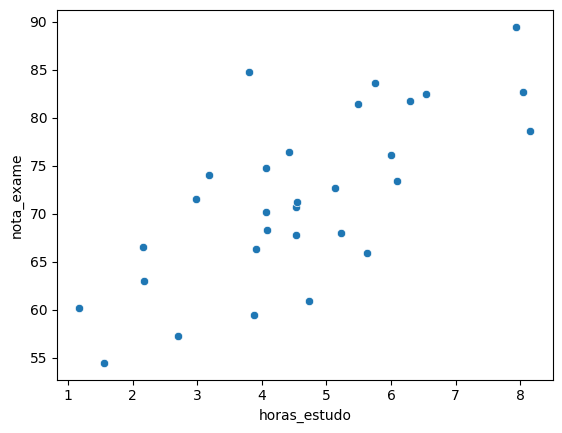

In [32]:
sns.scatterplot(x=df_nota['horas_estudo'], y=df_nota['nota_exame'])

In [33]:
df_nota.corr()

,id,horas_estudo,nota_exame,intercepto
id,1.000000,-0.343719,-0.048072,NaN
horas_estudo,-0.343719,1.000000,0.721178,NaN
nota_exame,-0.048072,0.721178,1.000000,NaN
intercepto,NaN,NaN,NaN,NaN


### Base Notas V2

In [34]:
df_nota1 = pd.read_csv('/content/Base_Notas_v2.csv')

df_nota1.head()

,id,horas_estudo,aulas_participadas,nota_exame
0,0,5.993428,8,76.119754
1,1,4.723471,11,60.929961
2,2,6.295377,12,81.731317
3,3,8.046060,7,82.699637
4,4,4.531693,5,70.662399


In [35]:
df_nota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30 non-null     int64  
 1   horas_estudo        30 non-null     float64
 2   aulas_participadas  30 non-null     int64  
 3   nota_exame          30 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


In [36]:
df_nota1.describe().round(2)

,id,horas_estudo,aulas_participadas,nota_exame
count,30.00,30.00,30.00,30.00
mean,14.50,4.62,9.80,71.81
std,8.80,1.80,2.87,8.88
min,0.00,1.17,5.00,54.48
25%,7.25,3.82,8.00,66.41
50%,14.50,4.53,10.00,71.40
75%,21.75,5.72,12.00,78.10
max,29.00,8.16,14.00,89.47


In [37]:
df_nota1.isna().sum()

,0
id,0
horas_estudo,0
aulas_participadas,0
nota_exame,0


<Axes: xlabel='aulas_participadas', ylabel='nota_exame'>

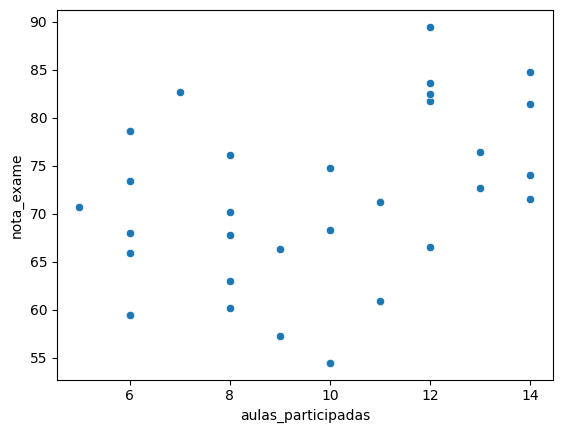

In [38]:
#grafico de dispersão
# eixo x explicativa
# eixo y resposta ou alvo (dependente)

sns.scatterplot(x=df_nota1['aulas_participadas'], y=df_nota1['nota_exame'])

In [39]:
#Correlação linear de pearson

df_nota1.corr()

,id,horas_estudo,aulas_participadas,nota_exame
id,1.000000,-0.343719,0.353535,-0.048072
horas_estudo,-0.343719,1.000000,-0.136144,0.721178
aulas_participadas,0.353535,-0.136144,1.000000,0.385559
nota_exame,-0.048072,0.721178,0.385559,1.000000


In [40]:
# ajuste do modelo

#variavel alvo

y = df_nota1['nota_exame']


#variavel explicativa
df_nota1['intercepto'] = 1
x=df_nota1[['intercepto','horas_estudo','aulas_participadas']]

In [41]:
modelo1 = sm.OLS(y,x)

resultado1 = modelo1.fit()

In [42]:
print(resultado1.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     42.41
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           4.66e-09
Time:                        22:57:16   Log-Likelihood:                -86.250
No. Observations:                  30   AIC:                             178.5
Df Residuals:                      27   BIC:                             182.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto            38.8906      3

### Base Notas V3

In [43]:
df_nota2 = pd.read_csv('/content/Base_Notas_v3.csv')


df_nota2.head()

,id,horas_estudo,aulas_participadas,sono_medio,nota_exame
0,0,5.993428,8,7.343618,76.119754
1,1,4.723471,11,5.236960,60.929961
2,2,6.295377,12,7.324084,81.731317
3,3,8.046060,7,6.614918,82.699637
4,4,4.531693,5,6.323078,70.662399


In [44]:
df_nota2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30 non-null     int64  
 1   horas_estudo        30 non-null     float64
 2   aulas_participadas  30 non-null     int64  
 3   sono_medio          30 non-null     float64
 4   nota_exame          30 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.3 KB


In [45]:
df_nota2.describe().round(2)


,id,horas_estudo,aulas_participadas,sono_medio,nota_exame
count,30.00,30.00,30.00,30.00,30.00
mean,14.50,4.62,9.80,7.06,71.81
std,8.80,1.80,2.87,0.97,8.88
min,0.00,1.17,5.00,4.38,54.48
25%,7.25,3.82,8.00,6.54,66.41
50%,14.50,4.53,10.00,7.21,71.40
75%,21.75,5.72,12.00,7.82,78.10
max,29.00,8.16,14.00,8.56,89.47


<Axes: xlabel='sono_medio', ylabel='nota_exame'>

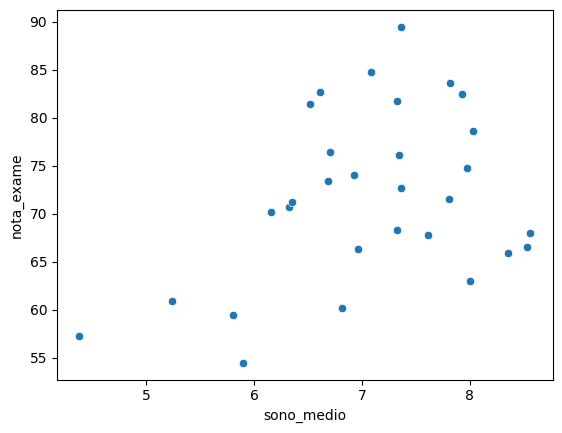

In [46]:
#grafico de dispersão
# eixo x explicativa
# eixo y resposta ou alvo (dependente)

sns.scatterplot(x=df_nota2['sono_medio'], y=df_nota2['nota_exame'])

In [47]:
df_nota2.corr()

,id,horas_estudo,aulas_participadas,sono_medio,nota_exame
id,1.000000,-0.343719,0.353535,0.096266,-0.048072
horas_estudo,-0.343719,1.000000,-0.136144,0.215949,0.721178
aulas_participadas,0.353535,-0.136144,1.000000,0.037439,0.385559
sono_medio,0.096266,0.215949,0.037439,1.000000,0.370024
nota_exame,-0.048072,0.721178,0.385559,0.370024,1.000000


In [48]:
# ajuste do modelo

#variavel alvo

y = df_nota2['nota_exame']


#variavel explicativa
df_nota2['intercepto'] = 1
x=df_nota2[['intercepto','horas_estudo','aulas_participadas','sono_medio']]

In [49]:
modelo2 = sm.OLS(y,x)

resultado2 = modelo2.fit()

In [50]:
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     33.24
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           4.76e-09
Time:                        22:57:16   Log-Likelihood:                -83.926
No. Observations:                  30   AIC:                             175.9
Df Residuals:                      26   BIC:                             181.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto            27.9742      6

### Version 4 correlação bem fraca

In [51]:
df_nota3 = df_nota2.drop(columns=['aulas_participadas'], axis=1)

df_nota3.head()

,id,horas_estudo,sono_medio,nota_exame,intercepto
0,0,5.993428,7.343618,76.119754,1
1,1,4.723471,5.236960,60.929961,1
2,2,6.295377,7.324084,81.731317,1
3,3,8.046060,6.614918,82.699637,1
4,4,4.531693,6.323078,70.662399,1


In [52]:
df_nota3.corr()

,id,horas_estudo,sono_medio,nota_exame,intercepto
id,1.000000,-0.343719,0.096266,-0.048072,NaN
horas_estudo,-0.343719,1.000000,0.215949,0.721178,NaN
sono_medio,0.096266,0.215949,1.000000,0.370024,NaN
nota_exame,-0.048072,0.721178,0.370024,1.000000,NaN
intercepto,NaN,NaN,NaN,NaN,NaN


In [53]:
# ajuste do modelo

#variavel alvo

y = df_nota3['nota_exame']


#variavel explicativa
df_nota3['intercepto'] = 1
x=df_nota3[['intercepto','sono_medio','horas_estudo']]

In [62]:
modelo3 = sm.OLS(y,x)

resultado3 = modelo3.fit()

In [63]:
print(resultado3.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.19e-05
Time:                        22:57:20   Log-Likelihood:                -94.966
No. Observations:                  30   AIC:                             195.9
Df Residuals:                      27   BIC:                             200.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercepto      42.0142      8.288      5.069   

---


### Analise Descritiva Version One V1

---



In [56]:
df_nota['nota_exame'].round(2).value_counts().sort_values(ascending=True).head()

,count
nota_exame,
76.12,1
60.93,1
81.73,1
82.70,1
70.66,1


In [57]:
df_nota['nota_exame'].round(2).value_counts().sort_values(ascending=True).tail()

,count
nota_exame,
68.01,1
57.25,1
83.67,1
84.80,1
76.44,1


In [58]:
filtro_nota = df_nota['nota_exame'] > 60
df_nota[filtro_nota].round(2)

,id,horas_estudo,nota_exame,intercepto
0,0,5.99,76.12,1
1,1,4.72,60.93,1
2,2,6.30,81.73,1
3,3,8.05,82.70,1
4,4,4.53,70.66,1
5,5,4.53,67.76,1
6,6,8.16,78.65,1
7,7,6.53,82.49,1
8,8,4.06,70.14,1
9,9,6.09,73.37,1


---
### Analise Descritiva Version Two V2

---

In [59]:
df_nota1.head()

,id,horas_estudo,aulas_participadas,nota_exame,intercepto
0,0,5.993428,8,76.119754,1
1,1,4.723471,11,60.929961,1
2,2,6.295377,12,81.731317,1
3,3,8.046060,7,82.699637,1
4,4,4.531693,5,70.662399,1


In [60]:
df_nota1['aulas_participadas'].round(2).value_counts().sort_values(ascending=True).head()

,count
aulas_participadas,
7,1
5,1
13,2
9,2
11,2


In [61]:
filtro_nota1 = df_nota1['aulas_participadas'] > 6
df_nota1[filtro_nota1].round(2)

,id,horas_estudo,aulas_participadas,nota_exame,intercepto
0,0,5.99,8,76.12,1
1,1,4.72,11,60.93,1
2,2,6.30,12,81.73,1
3,3,8.05,7,82.70,1
5,5,4.53,8,67.76,1
7,7,6.53,12,82.49,1
8,8,4.06,8,70.14,1
10,10,4.07,10,68.31,1
11,11,4.07,10,74.79,1
12,12,5.48,14,81.46,1


---
### Analise Descritiva Version Three V3

---